<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek36.do.txt  -->
<!-- dom:TITLE: Exercises week 36 -->

# Exercises week 36
**September 2-6, 2024**

Date: **Deadline is Friday September 6 at midnight**

Name: **Ómar Bragi Sigurðsson**

## Overarching aims of the exercises this week

This set of exercises form an important part of the first project. The
analytical exercises deal with the material covered last week on the
mathematical interpretations of ordinary least squares and of Ridge
regression. The numerical exercises can be seen as a continuation of
exercise 3 from week 35, with the inclusion of Ridge regression. This
material enters also the discussions of the first project.

## Exercise 1: Analytical exercises

The aim here is to derive the expression for the optimal parameters
using Ridge regression. Furthermore, using the singular value
decomposition, we will analyze the difference between the ordinary
least squares approach and Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the
optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

which we can also write as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. One can require as part of the optimization problem 
that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. We will not implement that here.

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

**Solution:**

$$
C_{R}(\boldsymbol{\beta}) = \frac{1}{n}\sum_{i=0}^{n-1}(\boldsymbol{y}_{i} - \sum_{j=0}^{p-1}\boldsymbol{X}_{ij}\boldsymbol{\beta}_j)^2 + \lambda \sum_{j=0}^{p-1} \boldsymbol{\beta}_{j}^2 
$$

Now let's take the derivative of $C_{R}(\boldsymbol{\beta})$

$$
\frac{\partial C_{R}(\boldsymbol{\beta})}{\partial \beta_{k}} = \frac{\partial}{\partial \beta_{k}} \frac{1}{n}\sum_{i=0}^{n-1}(\boldsymbol{y}_{i} - \sum_{j=0}^{p-1}\boldsymbol{X}_{ij}\boldsymbol{\beta})^2 + \frac{\partial}{\partial \beta_{k}}\lambda \sum_{j=0}^{p-1} \boldsymbol{\beta}_{j}^2 
$$
We apply the chain rule on the first term and second term is trivial, then what we get is
$$
-\frac{2}{n}\sum_{i=0}^{n-1}(\boldsymbol{y}_{i} - \sum_{j=0}^{p-1}\boldsymbol{X}_{ij}\boldsymbol{\beta})\frac{\partial (\sum_{j=0}^{p-1}\boldsymbol{X}_{ij}\boldsymbol{\beta})}{\partial \beta_k} + 2 \lambda \sum_{j=0}^{p-1}\boldsymbol{\beta}_{j}
$$
$$
\Rightarrow -\frac{2}{n}\sum_{i=0}^{n-1}\boldsymbol{X}_{ik}(\boldsymbol{y}_{i} - \sum_{j=0}^{p-1}\boldsymbol{X}_{ij}\boldsymbol{\beta}) + 2 \lambda \sum_{j=0}^{p-1}\boldsymbol{\beta}_{j}.
$$
Now let's present it in array-form
$$
\frac{\partial C_{R}(\boldsymbol{\beta})}{\partial \beta_{k}} = \boldsymbol{X}^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}) + 2\lambda \boldsymbol{\beta}
$$
Now we set $\frac{\partial C_{R}(\boldsymbol{\beta})}{\partial \beta_{k}} = 0$ 
$$
-\frac{2}{n}\boldsymbol{X}^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}) + 2\lambda \boldsymbol{\beta} = 0
$$
$$
(\boldsymbol{X}^T\boldsymbol{X} + n\lambda \boldsymbol{I}_{p\times p}) \boldsymbol{\beta} = \boldsymbol{X}^T\boldsymbol{y} \Rightarrow \boldsymbol{\beta} = (\boldsymbol{X}^T\boldsymbol{X} + n\lambda \boldsymbol{I}_{p\times p})^{-1} \boldsymbol{X}^T\boldsymbol{y}
$$


________________________________________________________________________________________________________________________________________________________

### b) The singular value decomposition

Here we will use the singular value decomposition of an $n\times p$ matrix $\boldsymbol{X}$ (our design matrix)

$$
\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

to study properties of Ridge regression and ordinary least squares regression.
Here $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal matrices of dimensions
$n\times n$ and $p\times p$, respectively, and $\boldsymbol{\Sigma}$ is an
$n\times p$ matrix which contains the singular values only. This material was discussed during the lectures of week 35.

Show that you can write the 
OLS solutions in terms of the eigenvectors (the columns) of the orthogonal matrix  $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  = \sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y}.
$$

**Sollution:**

________________________________________________________________________________________________________________________________________________________

Let's begin by setting $\boldsymbol{X}= \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$ and plug it into our parametrized $\boldsymbol{\beta}$, i.e.

$$
\boldsymbol{\beta}_{OLS} = (\boldsymbol{X}^T \boldsymbol{X})^{-1}\boldsymbol{X}^{T}\boldsymbol{y} \quad (OLS)
$$
then 
$$
\boldsymbol{\beta}_{OLS} = (\boldsymbol{V}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T)^{-1} \boldsymbol{V}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{y}
$$
Now we use the fact that $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal matrices, that is $\boldsymbol{U}\boldsymbol{U}^T = \boldsymbol{U}^{T}\boldsymbol{U} = \boldsymbol{I}$ where $\boldsymbol{I}$ is the identity matrix.
$$
\boldsymbol{\beta}_{OLS} = (\boldsymbol{V}\boldsymbol{\Sigma}^{T}\boldsymbol{\Sigma}\boldsymbol{V}^T)^{-1} \boldsymbol{V}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{y} = \boldsymbol{V}(\boldsymbol{\Sigma}^{T}\boldsymbol{\Sigma})^{-1}\boldsymbol{V}^T \boldsymbol{V}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{y}= \boldsymbol{V}(\boldsymbol{\Sigma}^{T}\boldsymbol{\Sigma})^{-1}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{y}.
$$
Let's define $\tilde{\boldsymbol{\Sigma}}^{2} = \boldsymbol{\Sigma}^{T}\boldsymbol{\Sigma}$ which is a $p \times p$ matrix with only elements on the diagonal squared, then
$$
\boldsymbol{\beta}_{OLS} = \boldsymbol{V}(\tilde{\boldsymbol{\Sigma}}^{2})^{-1}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{y}.
$$
Now with OLS solution we have 
$$
\tilde{\boldsymbol{y}}_{OLS} = \boldsymbol{X}\boldsymbol{\beta}_{OLS} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\boldsymbol{V}(\tilde{\boldsymbol{\Sigma}}^{2})^{-1}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{y} = \boldsymbol{U}\boldsymbol{\Sigma}(\tilde{\boldsymbol{\Sigma}}^{2})^{-1}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^T \boldsymbol{y}.
$$
We have $\boldsymbol{\Sigma}(\tilde{\boldsymbol{\Sigma}}^{2})^{-1}\boldsymbol{\Sigma}^{T}$ which becomes a psuedo identity matrix, i.e. we have ones on the diagonal up to $p$ since $\boldsymbol{\Sigma}$ is an $n \times p$ matrix with elements on the diagonal line $\sigma_{0},\sigma_{1},\dots, \sigma_{p-1}$ and all other elements are zero. 

So what we end up with is $\tilde{I}$ which is an $n \times n$ matrix with ones up to $p$ term and other are zeros. Then all columns of $\boldsymbol{U}^T$ becomes zero after $p$ when it is multiplied with $\tilde{I}$, then we cannot use its orthogonality anymore and we get: 
$$
\tilde{\boldsymbol{y}}_{OLS} = \boldsymbol{U}\tilde{I}\boldsymbol{U}^T\boldsymbol{y} = \boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y} = \sum_{j=0}^{p-1}\boldsymbol{u}_{j}\boldsymbol{u}_{j}^{T}\boldsymbol{y}
$$

________________________________________________________________________________________________________________________________________________________

For Ridge regression, show that the corresponding equation is

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$. 

Give an interpretation of the results.  [Section 3.4 of Hastie et al's textbook gives a good discussion of the above results](https://link.springer.com/book/10.1007/978-0-387-84858-7).

**Solution:**

________________________________________________________________________________________________________________________________________________________

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}\boldsymbol{V}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^{T}\boldsymbol{y}
$$
We set $\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1} = \left( \boldsymbol{V}\left(\boldsymbol{\Sigma}^2+\lambda\boldsymbol{I}\right)\boldsymbol{V}^{T} \right)^{-1} = \boldsymbol{V}\left(\boldsymbol{\Sigma}^2+\lambda\boldsymbol{I} \right)^{-1} \boldsymbol{V}^{T}$ and plug that into the Ridge solution
$$
\boldsymbol{U\Sigma V^T}\boldsymbol{V}\left(\boldsymbol{\Sigma}^2+\lambda\boldsymbol{I} \right)^{-1}\boldsymbol{V}^T\boldsymbol{V}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^{T}\boldsymbol{y}
$$
Now we use the fact that $\boldsymbol{V}$ is an orthogonal matrix and we get
$$
\boldsymbol{U\Sigma}\left(\boldsymbol{\Sigma}^2+\lambda\boldsymbol{I} \right)^{-1}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^{T}\boldsymbol{y}
$$
Same as before, that is $\boldsymbol{\Sigma \Sigma^{T}}$ becomes an $n \times n$ matrix where the diagonal are $\sigma_{i}^{2}$ up to $p$ then all other elements are zero after $p$. Then we can write our equation as
$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma}\left(\boldsymbol{\Sigma}^2+\lambda\boldsymbol{I} \right)^{-1}\boldsymbol{\Sigma}^{T}\boldsymbol{U}^{T}\boldsymbol{y} = \sum_{j=0}^{p-1}\boldsymbol{u}_{j}\frac{\sigma_{j}^2}{\sigma_{j}^2 + \lambda}\boldsymbol{u}_{j}^T \boldsymbol{y}.
$$

If $\lambda = 0$ then we get $\boldsymbol{y}_{\mathrm{OLS}}$. If $\lambda > 0$ then $0<\frac{\sigma_{j}^2}{\sigma_{j}^2 + \lambda} < 1$, and we know that $\sigma_{j}>\sigma_{j+1}>0$ $\forall j = 0,1,\dots,p-1$. This means that each column $\boldsymbol{u}_{j}^{T}$ gets smaller by a factor of $\frac{\sigma_{j}^2}{\sigma_{j}^2 + \lambda}$, which means that after multiplying $\boldsymbol{u}_{j}^{T}\boldsymbol{y}$ it gets smaller by a factor of  $\frac{\sigma_{j}^2}{\sigma_{j}^2 + \lambda}$. Then we get that
$$
\sum_{j=0}^{p-1}\boldsymbol{u}_{j}\frac{\sigma_{j}^2}{\sigma_{j}^2 + \lambda}\boldsymbol{u}_{j}^T \boldsymbol{y} < \sum_{j=0}^{p-1}\boldsymbol{u}_{j}\boldsymbol{u}_{j}^{T}\boldsymbol{y}
$$
$$
\Rightarrow \tilde{\boldsymbol{y}}_{\mathrm{Ridge}} < \tilde{\boldsymbol{y}}_{\mathrm{OLS}}
$$
That is if $\tilde{\boldsymbol{y}}_{\mathrm{OLS}} > \tilde{\boldsymbol{y}}_{\mathrm{Ideal}}$ then we can use the penalty term to get a better approximation to $\tilde{\boldsymbol{y}}_{\mathrm{Ideal}}$.

________________________________________________________________________________________________________________________________________________________

## Exercise 2: Adding Ridge Regression

This exercise is a continuation of exercise 3 from week 35, see <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/exercisesweek35.html>. We will use the same function to
generate our data set, still staying with a simple function $y(x)$
which we want to fit using linear regression, but now extending the
analysis to include the Ridge regression method.

In this exercise you need to include the same elements from last week, that is
1. scale your data by subtracting the mean value from each column in the design matrix.

2. perform a split of the data in a training set and a test set.

The addition to the analysis this time is the introduction of the hyperparameter $\lambda$ when introducing Ridge regression.

Extend the code from exercise 3 from [week 35](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/exercisesweek35.html) to include Ridge regression with the hyperparameter $\lambda$. The optimal parameters $\hat{\beta}$ for Ridge regression can be obtained by matrix inversion in a similar way as done for ordinary least squares. You need to add to your code the following equations

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The ordinary least squares result you encoded last week is given by

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

Use these results to compute the mean squared error for ordinary least
squares and Ridge regression first for a polynomial of degree five
with $n=100$ data points and five selected values of
$\lambda=[0.0001,0.001, 0.01,0.1,1.0]$. Compute thereafter the mean
squared error for the same values of $\lambda$ for polynomials of degree ten
and $15$. Discuss your results for the training MSE and test MSE with
Ridge regression and ordinary least squares.

**Solution:**

________________________________________________________________________________________________________________________________________________________
I am not quite sure why but my test error is lower than my training error, which leads me to think that my code is wrong. Since it is weird that the model is able to predict unknown quantities better than the known ones. I would definitely like some criticism or explanation on why this is. Thank you.
________________________________________________________________________________________________________________________________________________________

In [19]:
import numpy as np
np.random.seed(100)
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [20]:
from sklearn.preprocessing import StandardScaler

degree = 5
X = np.zeros((len(x),degree))
#Creating our design matrix
for k in range(degree):
    for i in range(len(x)):
        X[i,k] = np.squeeze(x[i]**(k + 1))
# Scaling our data
X_scaled = np.zeros((len(x),degree))
for i in range(degree):
    X_scaled[:,i] = X[:,i] - np.mean(X[:,i])

y_scaled = y - np.mean(y)
#X[:,0:5]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

X_ttrain, X_ttest, y_ttrain, y_ttest = train_test_split(X_train,y_train,test_size = 0.2)

<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\l'
C:\Users\omarb\AppData\Local\Temp\ipykernel_2020\1293893020.py:41: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\lambda$ = ' + str(lamb[i]))


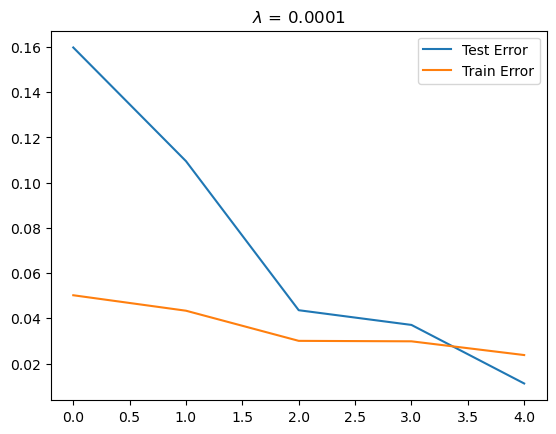

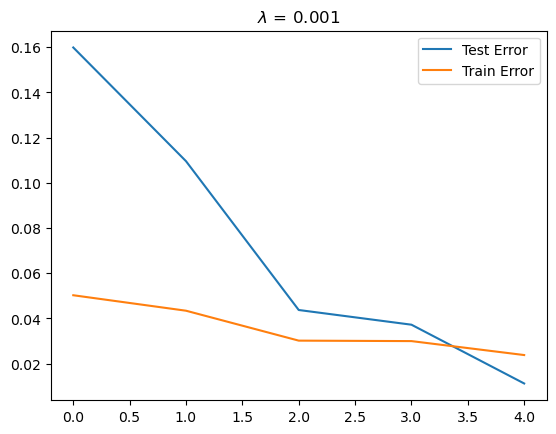

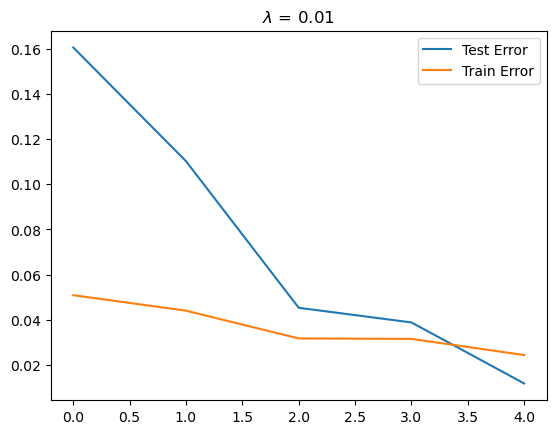

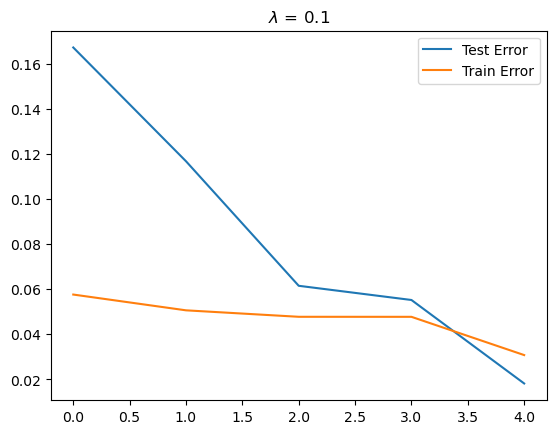

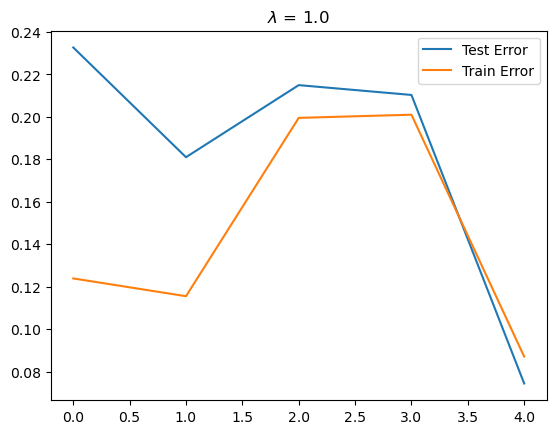

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


TrainErrorO = np.zeros(degree)
TestErrorO = np.zeros(degree)
polydegree = np.zeros(degree)

TrainErrorR = np.zeros((degree,5))
TestErrorR = np.zeros((degree,5))
k = 0
n_train = len(y_train)
n_test = len(y_test)
lamb = [0.0001, 0.001, 0.01, 0.1, 1.0]
for x in lamb:
    #print(x)
    for i in range(degree):
        I = np.eye(i + 1)
        #print(I.shape)
        X_train1 = X_train[:,0:i+1]
        X_test1 = X_test[:,0:i+1]
        betaR = (np.linalg.inv(X_train1.T @ X_train1 + x*I) @ X_train1.T) @ y_train
        betaO = (np.linalg.inv(X_train1.T @ X_train1) @ X_train1.T) @ y_train
        y_fitR = X_train1 @ betaR
        y_predR = X_test1 @ betaR
        y_fitO = X_train1 @ betaO
        y_predO = X_test1 @ betaO
        polydegree[i] = i
        TestErrorR[i,k] = np.sum((y_test - y_predR)**2)/n_test + x*np.sum(betaR**2)
        TrainErrorR[i,k] = np.sum((y_train - y_fitR)**2)/n_train + x*np.sum(betaR**2)
        TestErrorO[i] = np.sum((y_test - y_predO)**2)/n_test
        TrainErrorO[i] = np.sum((y_train - y_fitO)**2)/n_train
    k = k+1

for i in range(len(lamb)):
    plt.plot(polydegree, TestErrorR[:,i], label='Test Error')
    plt.plot(polydegree, TrainErrorR[:,i], label='Train Error')
    plt.title('$\lambda$ = ' + str(lamb[i]))
    plt.legend()
    plt.show()

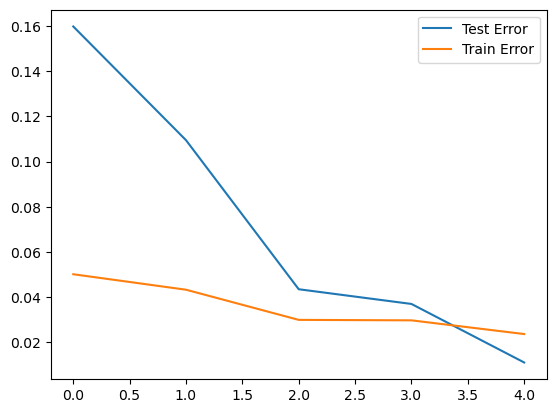

In [23]:
plt.plot(polydegree, TestErrorO, label='Test Error')
plt.plot(polydegree, TrainErrorO, label='Train Error')
plt.legend()
plt.show()

<>:65: SyntaxWarning: invalid escape sequence '\l'
<>:65: SyntaxWarning: invalid escape sequence '\l'
C:\Users\omarb\AppData\Local\Temp\ipykernel_2020\1140845717.py:65: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\lambda$ = ' + str(lamb[i]))


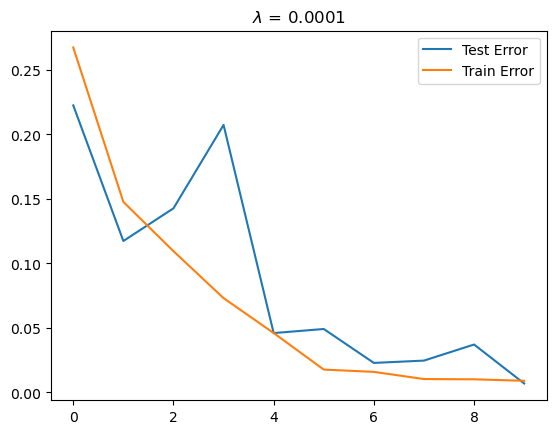

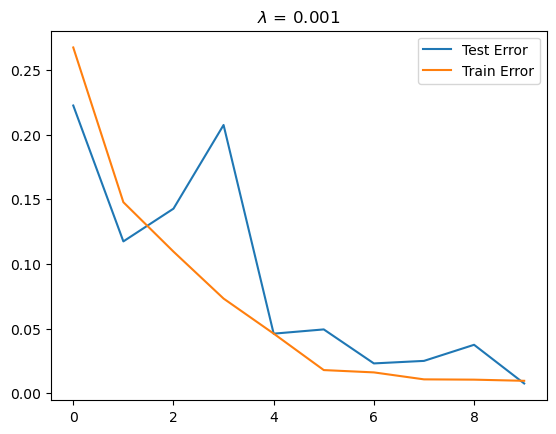

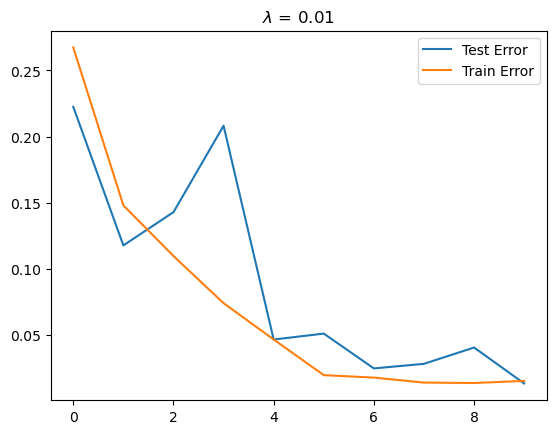

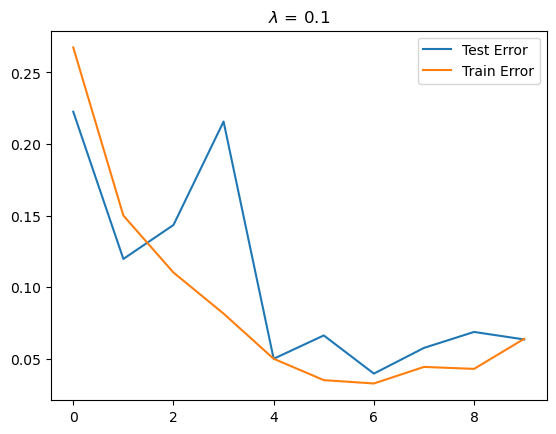

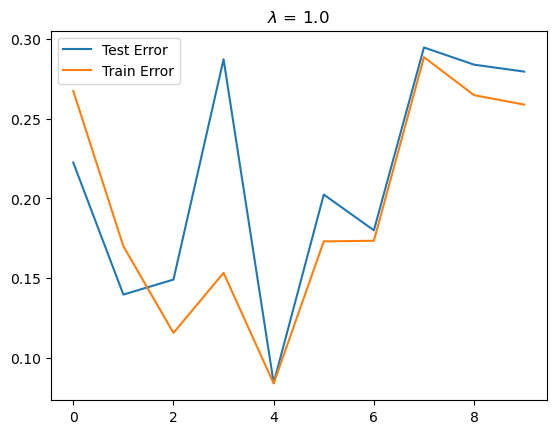

In [24]:
#For a 10 degree polynomial
np.random.seed(100)
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)


degree = 10
X = np.zeros((len(x),degree))
#Creating our design matrix
for k in range(degree):
    for i in range(len(x)):
        X[i,k] = np.squeeze(x[i]**(k + 1))
# Scaling our data
X_scaled = np.zeros((len(x),degree))
for i in range(degree):
    X_scaled[:,i] = X[:,i] - np.mean(X[:,i])

X_scaled = X - np.mean(X)
y_scaled = y - np.mean(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


TrainErrorO = np.zeros(degree)
TestErrorO = np.zeros(degree)
polydegree = np.zeros(degree)

TrainErrorR = np.zeros((degree,5))
TestErrorR = np.zeros((degree,5))
k = 0
n_train = len(y_train)
n_test = len(y_test)
lamb = [0.0001, 0.001, 0.01, 0.1, 1.0]
for x in lamb:
    #print(x)
    for i in range(degree):
        I = np.eye(i + 1)
        #print(I.shape)
        X_train1 = X_train[:,0:i+1]
        X_test1 = X_test[:,0:i+1]
        betaR = (np.linalg.inv(X_train1.T @ X_train1 + x*I) @ X_train1.T) @ y_train
        betaO = (np.linalg.inv(X_train1.T @ X_train1) @ X_train1.T) @ y_train
        y_fitR = X_train1 @ betaR
        y_predR = X_test1 @ betaR
        y_fitO = X_train1 @ betaO
        y_predO = X_test1 @ betaO
        polydegree[i] = i
        TestErrorR[i,k] = np.sum((y_test - y_predR)**2)/n_test + x*np.sum(betaR**2)
        TrainErrorR[i,k] = np.sum((y_train - y_fitR)**2)/n_train + x*np.sum(betaR**2)
        TestErrorO[i] = np.sum((y_test - y_predO)**2)/n_test
        TrainErrorO[i] = np.sum((y_train - y_fitO)**2)/n_train
    k = k+1

for i in range(len(lamb)):
    plt.plot(polydegree, TestErrorR[:,i], label='Test Error')
    plt.plot(polydegree, TrainErrorR[:,i], label='Train Error')
    plt.title('$\lambda$ = ' + str(lamb[i]))
    plt.legend()
    plt.show()

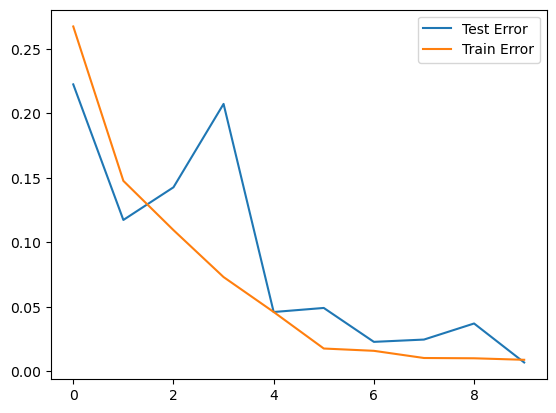

In [25]:
plt.plot(polydegree, TestErrorO, label='Test Error')
plt.plot(polydegree, TrainErrorO, label='Train Error')
plt.legend()
plt.show()

<>:65: SyntaxWarning: invalid escape sequence '\l'
<>:65: SyntaxWarning: invalid escape sequence '\l'
C:\Users\omarb\AppData\Local\Temp\ipykernel_2020\3416419076.py:65: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\lambda$ = ' + str(lamb[i]))


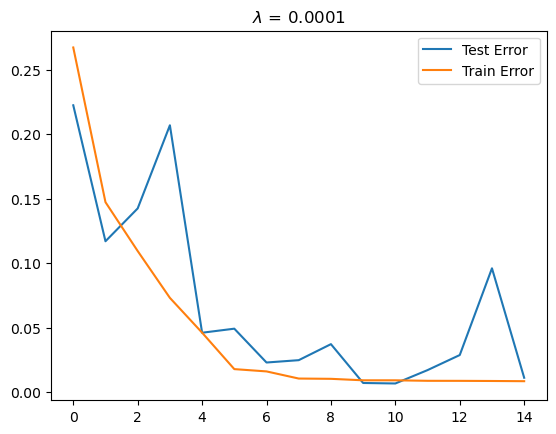

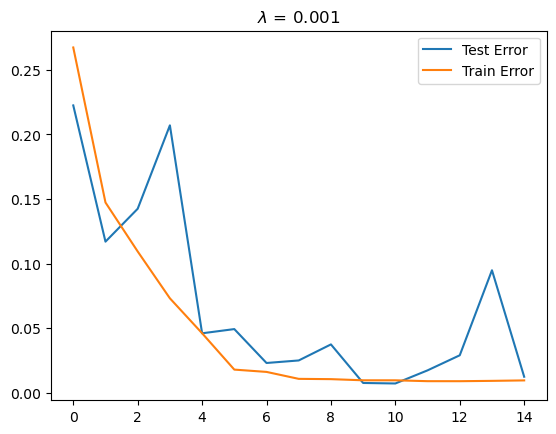

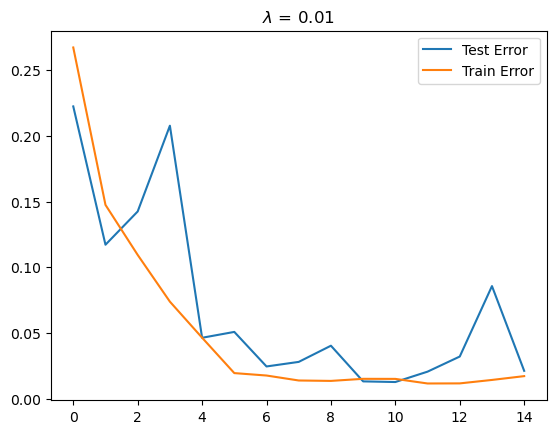

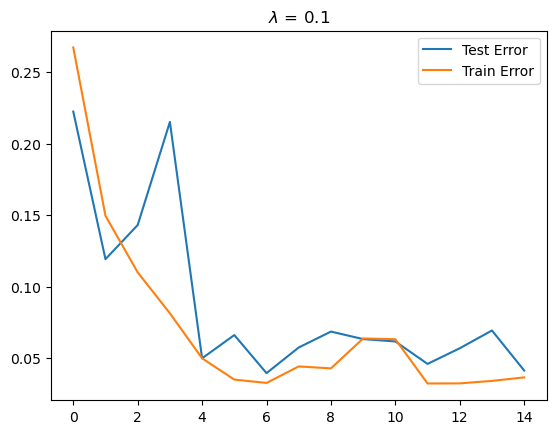

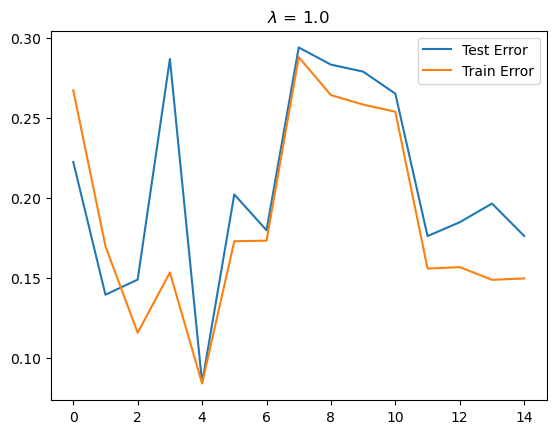

In [26]:
# For a 15 degree polynomial
np.random.seed(100)
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)


degree = 15
X = np.zeros((len(x),degree))
#Creating our design matrix
for k in range(degree):
    for i in range(len(x)):
        X[i,k] = np.squeeze(x[i]**(k + 1))
# Scaling our data
X_scaled = np.zeros((len(x),degree))
for i in range(degree):
    X_scaled[:,i] = X[:,i] - np.mean(X[:,i])

X_scaled = X - np.mean(X)
y_scaled = y - np.mean(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


TrainErrorO = np.zeros(degree)
TestErrorO = np.zeros(degree)
polydegree = np.zeros(degree)

TrainErrorR = np.zeros((degree,5))
TestErrorR = np.zeros((degree,5))
k = 0
n_train = len(y_train)
n_test = len(y_test)
lamb = [0.0001, 0.001, 0.01, 0.1, 1.0]
for x in lamb:
    #print(x)
    for i in range(degree):
        I = np.eye(i + 1)
        #print(I.shape)
        X_train1 = X_train[:,0:i+1]
        X_test1 = X_test[:,0:i+1]
        betaR = (np.linalg.inv(X_train1.T @ X_train1 + x*I) @ X_train1.T) @ y_train
        betaO = (np.linalg.inv(X_train1.T @ X_train1) @ X_train1.T) @ y_train
        y_fitR = X_train1 @ betaR
        y_predR = X_test1 @ betaR
        y_fitO = X_train1 @ betaO
        y_predO = X_test1 @ betaO
        polydegree[i] = i
        TestErrorR[i,k] = np.sum((y_test - y_predR)**2)/n_test + x*np.sum(betaR**2)
        TrainErrorR[i,k] = np.sum((y_train - y_fitR)**2)/n_train + x*np.sum(betaR**2)
        TestErrorO[i] = np.sum((y_test - y_predO)**2)/n_test
        TrainErrorO[i] = np.sum((y_train - y_fitO)**2)/n_train
    k = k+1

for i in range(len(lamb)):
    plt.plot(polydegree, TestErrorR[:,i], label='Test Error')
    plt.plot(polydegree, TrainErrorR[:,i], label='Train Error')
    plt.title('$\lambda$ = ' + str(lamb[i]))
    plt.legend()
    plt.show()

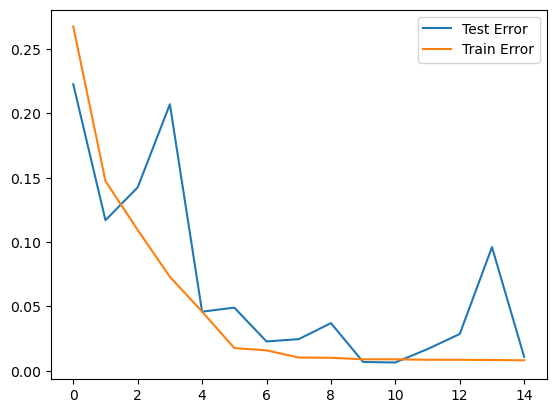

In [27]:
plt.plot(polydegree, TestErrorO, label='Test Error')
plt.plot(polydegree, TrainErrorO, label='Train Error')
plt.legend()
plt.show()